In [151]:
import pandas as pd
etching=pd.read_csv("C:/Users/sshyu/Downloads/반도체데이터/Etching.csv",index_col=0)
ion=pd.read_csv("C:/Users/sshyu/Downloads/반도체데이터/Ion_implantation.csv",index_col=0)
oxidation=pd.read_csv("C:/Users/sshyu/Downloads/반도체데이터/Oxidation.csv",index_col=0)
photo_lt=pd.read_csv("C:/Users/sshyu/Downloads/반도체데이터/Photo_lithograpy.csv")
photo_sb=pd.read_csv("C:/Users/sshyu/Downloads/반도체데이터/Photo_softbake.csv",index_col=0)
inspect=pd.read_csv("C:/Users/sshyu/Downloads/반도체데이터/Qualitylnspection.csv",index_col=0)

In [153]:
# 퀼리티의 마지막 4개 불필요한 행이 있음
inspect.dropna(inplace=True)

In [154]:
print(etching.shape)
print(ion.shape)
print(oxidation.shape)
print(photo_lt.shape)
print(photo_sb.shape)
print(inspect.shape)

(1704, 13)
(1704, 15)
(1704, 13)
(1704, 11)
(1704, 18)
(1704, 7)


## **데이터 하나씩 살펴보기**
### **Oxidation**

In [135]:
oxidation.head()

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2022
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2022
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2022
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2022
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2022


<Axes: >

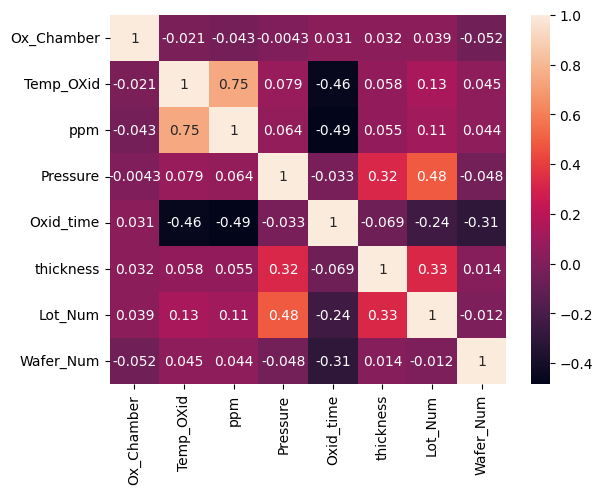

In [147]:
# Oxidation 데이터 살펴보기
import seaborn as sns
# 상관계수 그래프 그리기
# 이때 범주형, 시간형 데이터는 사용 불가하니 drop 하기
oxidation_heat=oxidation.drop(['No_Die','process','Vapor','type','Datetime'],axis=1,inplace=False)
sns.heatmap(oxidation_heat.corr(),annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2345ee6ce00>,
 'caps': [<matplotlib.lines.Line2D at 0x2345ee6fec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2345ee6c290>],
 'medians': [<matplotlib.lines.Line2D at 0x2345ee6e5a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2345ee6e570>],
 'means': []}

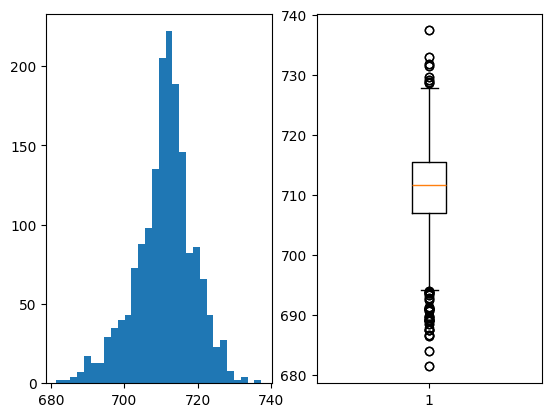

In [172]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,2)
axes[0].hist(oxidation['thickness'],bins=30)
axes[1].boxplot(oxidation['thickness'])

<Axes: ylabel='thickness'>

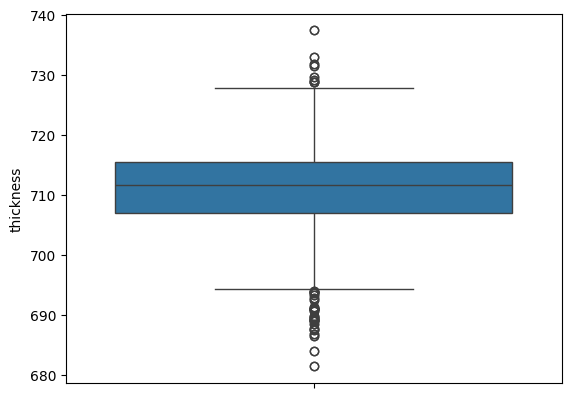

In [149]:
sns.boxplot(oxidation['thickness'])

### **Photo_Softbake**

<Axes: >

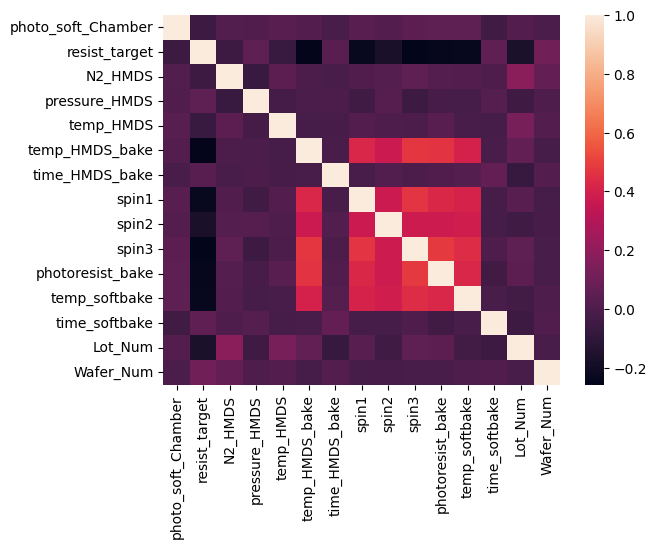

In [174]:
# 이때 범주형, 시간형 데이터는 사용 불가하니 drop 하기
photo_sb_heat=photo_sb.drop(['No_Die','process 2','Datetime'],axis=1,inplace=False)
sns.heatmap(photo_sb_heat.corr())

<Axes: >

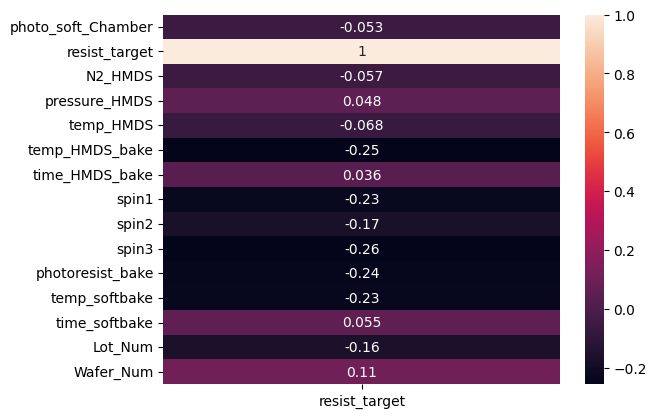

In [175]:
sns.heatmap(photo_sb_heat.corr()[['resist_target']],annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2345fb7b9e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2345fb7bf80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2345fb7b770>],
 'medians': [<matplotlib.lines.Line2D at 0x2345fbb4500>],
 'fliers': [<matplotlib.lines.Line2D at 0x2345fbb47d0>],
 'means': []}

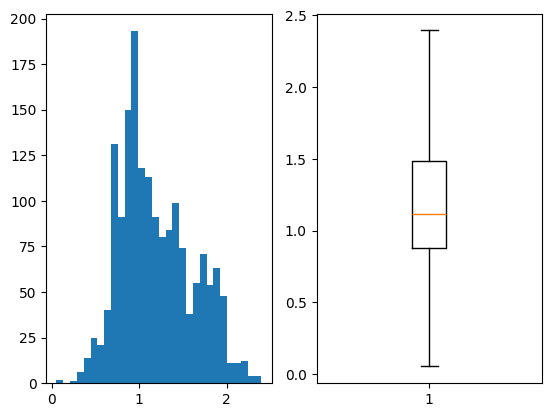

In [170]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,2)
axes[0].hist(photo_sb['resist_target'],bins=30)
axes[1].boxplot(photo_sb['resist_target'])

### **Photo_Litography**

In [183]:
photo_lt.head()

,No_Die,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,1,photo_li,41.676,I,365,505.388,109.628,13,28,01-03-2022
1,NOLSM326132326,1,photo_li,53.612,H,405,541.732,104.917,13,29,01-03-2022
2,NOLSM327133327,1,photo_li,47.598,I,365,532.200,106.632,13,30,01-03-2022
3,NOLSM328134328,1,photo_li,32.843,G,436,537.729,108.785,13,31,01-03-2022
4,NOLSM329135329,1,photo_li,57.370,H,405,522.143,109.913,13,32,01-03-2022


<Axes: >

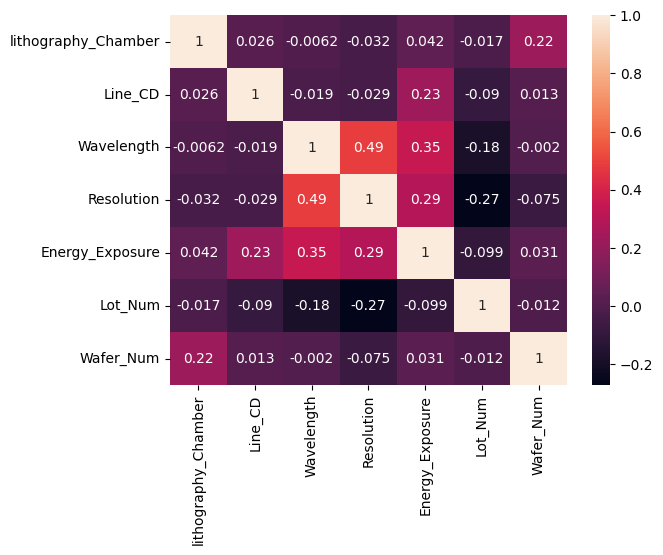

In [182]:
# 상관계수 그래프 그리기
# 이때 범주형, 시간형 데이터는 사용 불가하니 drop 하기
photo_lt_heat=photo_lt.drop(['No_Die','Process 2-1','UV_type','Datetime'],axis=1,inplace=False)
sns.heatmap(photo_lt_heat.corr(),annot=True)

<Axes: ylabel='Line_CD'>

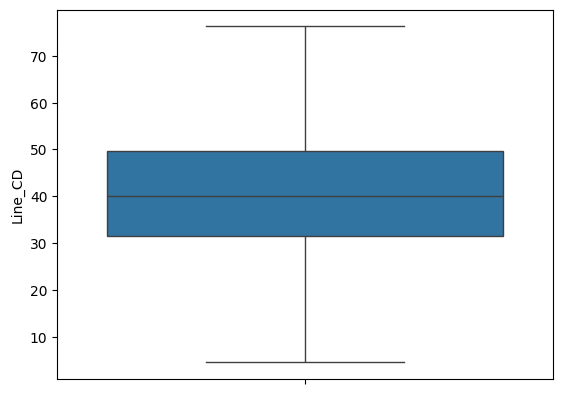

In [188]:
sns.boxplot(photo_lt['Line_CD'])

<Axes: xlabel='Line_CD', ylabel='Count'>

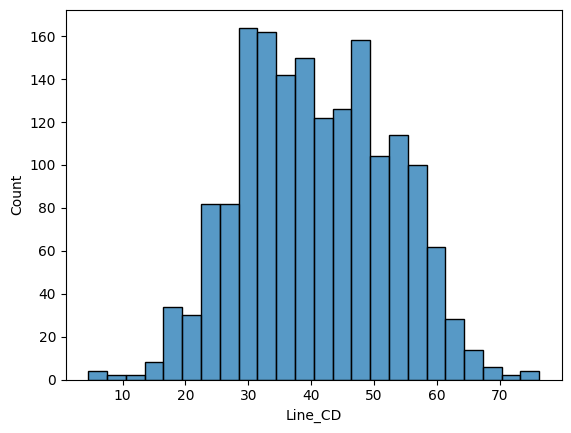

In [195]:
sns.histplot(photo_lt['Line_CD'])

### **Etching**

In [203]:
etching.head()

,No_Die,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,13,28,01-03-2022
1,NOLSM326132326,2,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,13,29,01-03-2022
2,NOLSM327133327,3,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,13,30,01-03-2022
3,NOLSM328134328,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,13,31,01-03-2022
4,NOLSM329135329,2,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,13,32,01-03-2022


<Axes: >

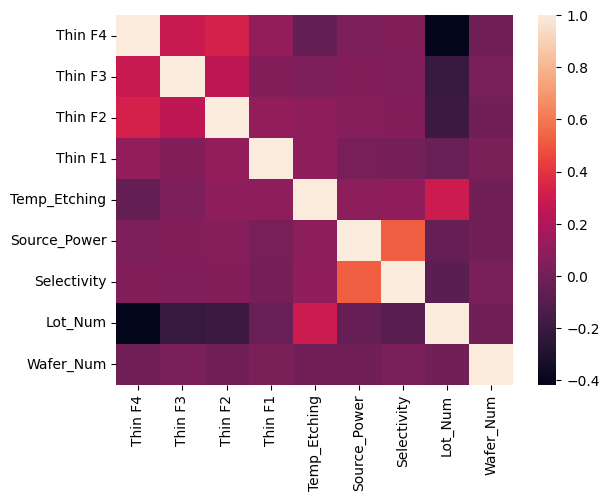

In [211]:
# 상관계수 그래프 그리기
# 이때 범주형, 시간형 데이터는 사용 불가하니 drop 하기
etching_heat=etching.drop(['No_Die','Etching_Chamber','Process 3','Datetime'],axis=1,inplace=False)
figsize=(10,16)
sns.heatmap(etching_heat.corr())

### **ion**

In [204]:
ion.head()

,No_Die,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,13,28,01-03-2022
1,NOLSM326132326,2,Implantation,1.110000e+16,4.370000e+16,1.040000e+18,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,13,29,01-03-2022
2,NOLSM327133327,3,Implantation,1.040000e+16,1.510000e+16,6.470000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,13,30,01-03-2022
3,NOLSM328134328,1,Implantation,8.885140e+15,1.020000e+17,3.410000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,13,31,01-03-2022
4,NOLSM329135329,2,Implantation,1.670000e+16,7.880000e+16,7.260000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,13,32,01-03-2022


In [209]:
ion['Chamber_Num'].value_counts()

Chamber_Num
1    592
3    564
2    548
Name: count, dtype: int64

<Axes: >

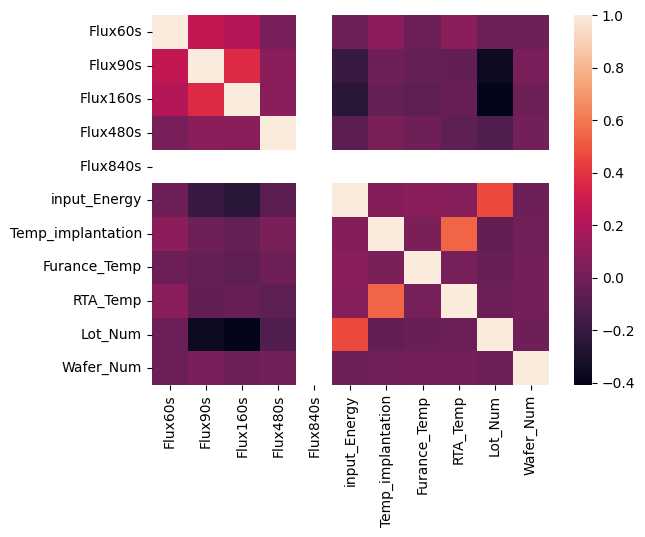

In [210]:
ion_heat=ion.drop(['No_Die','Chamber_Num','process4','Datetime'],axis=1,inplace=False)
sns.heatmap(ion_heat.corr())

In [213]:
ion['Flux840s'].value_counts()

Flux840s
6.000000e+17    1703
Name: count, dtype: int64

### **Inspect**

In [217]:
inspect.head()

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map
0.0,NOLSM325131325,13.0,28.0,01-03-2022,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
1.0,NOLSM326132326,13.0,29.0,01-03-2022,55.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...
2.0,NOLSM327133327,13.0,30.0,01-03-2022,96.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
3.0,NOLSM328134328,13.0,31.0,01-03-2022,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...
4.0,NOLSM329135329,13.0,32.0,01-03-2022,79.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...


In [218]:
inspect['Error_message'].value_counts()

Error_message
none               1580
[['Edge-Loc']]       57
[['Loc']]            31
[['Random']]         11
[['Center']]         10
[['Scratch']]         7
[['Near-full']]       4
[['Edge-Ring']]       4
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2346418ce00>,
 'caps': [<matplotlib.lines.Line2D at 0x2346418d340>,
 'boxes': [<matplotlib.lines.Line2D at 0x2346418cb30>],
 'medians': [<matplotlib.lines.Line2D at 0x2346418d820>],
 'fliers': [<matplotlib.lines.Line2D at 0x2346418dac0>],
 'means': []}

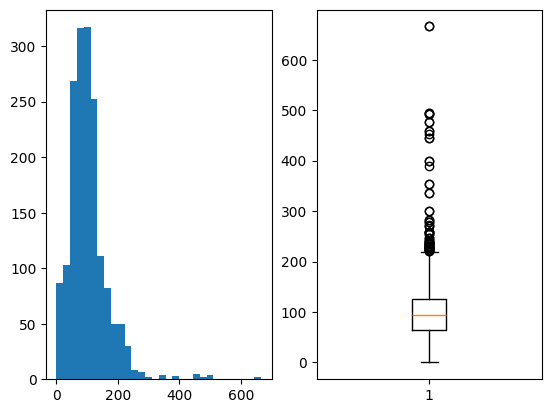

In [220]:
fig,axes=plt.subplots(1,2)
axes[0].hist(inspect['Target'],bins=30)
axes[1].boxplot(inspect['Target'])

In [221]:
inspect['Target_bin']=0
inspect.loc[inspect['Target']!=0,'Target_bin']=1

In [224]:
inspect['Target_bin'].value_counts()

Target_bin
1    1702
0       2
Name: count, dtype: int64

In [226]:
inspect[inspect['Target']==0]

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Target_bin
1331.0,NOLSM765299765,29.0,36.0,25-02-2022,0.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,0
1385.0,NOLSM765299,29.0,9.0,25-02-2022,0.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,0


([<matplotlib.patches.Wedge at 0x2346434c5f0>,
  ...],
 [Text(1.099998126113729, 0.0020304054483063516, ''),
  Text(1.0999831350639961, 0.006091188289876906, ''),
  Text(1.0999531531730862, 0.010151887735058873, ''),
  Text(1.0999081808290365, 0.014212450364361017, ''),
  Text(1.099848218687287, 0.01827281725410525, ''),
  Text(1.0997732675045082, 0.022332937165932303, ''),
  Text(1.0996833283777876, 0.026392750670424743, ''),
  Text(1.099578402555523, 0.030452202439957794, ''),
  Text(1.0994584912975054, 0.03451124329567913, ''),
  Text(1.0993235964080783, 0.03856981177564604, ''),
  Text(1.0991737195100997, 0.04262785871156424, ''),
  Text(1.0990088631225294, 0.04668531651521384, ''),
  Text(1.0988290288266402, 0.05074214626819644, ''),
  Text(1.0986342197991437, 0.054798276307991216, ''),
  Text(1.0984244374701189, 0.05885367591283526, ''),
  Text(1.0981996863920707, 0.06290825707614126, ''),
  Text(1.0979599680630387, 0.06696199318278545, ''),
  Text(1.097705287201369, 0.0710148044

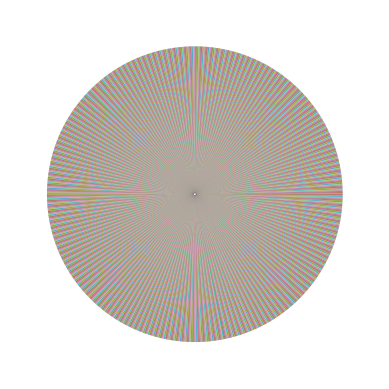

In [222]:
plt.pie(inspect['Target_bin'])

In [127]:
# 데이터 병합을 위해 중복되는 열 제거
photo_softbake.columns

Index(['No_Die', 'photo_soft_Chamber', 'process 2', 'resist_target', 'N2_HMDS',
       'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake',
       'spin1', 'spin2', 'spin3', 'photoresist_bake', 'temp_softbake',
       'time_softbake', 'Lot_Num', 'Wafer_Num', 'Datetime'],
      dtype='object')

In [125]:
quality['Error_message'].head()

0.0    none
1.0    none
2.0    none
3.0    none
4.0    none
Name: Error_message, dtype: object

In [108]:
df.head()

,No_Die,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Lot_Num_y,Wafer_Num_y,Datetime_y
0,NOLSM100419,2,Etching,357.0,1411.0,3668.0,5720.0,72.288,50.875,1.036,...,1.200000e+18,3.030000e+17,6.000000e+17,31575.591,101.321,916.0,149,4,19,20-02-2022
1,NOLSM100419100,1,Etching,357.0,1411.0,3668.0,5720.0,72.288,50.875,1.036,...,1.200000e+18,3.030000e+17,6.000000e+17,31575.591,101.321,916.0,149,4,46,20-02-2022
2,NOLSM10110,2,Etching,466.0,1603.0,3643.0,5703.0,69.948,50.944,1.024,...,4.670000e+17,3.010000e+17,6.000000e+17,32927.629,106.633,898.0,158,1,10,17-02-2022
3,NOLSM1011010,1,Etching,466.0,1603.0,3643.0,5703.0,69.948,50.944,1.024,...,4.670000e+17,3.010000e+17,6.000000e+17,32927.629,106.633,898.0,158,1,37,17-02-2022
4,NOLSM101420,1,Etching,405.0,1584.0,3660.0,5732.0,70.823,50.187,1.036,...,6.980000e+17,3.020000e+17,6.000000e+17,32022.906,104.284,907.0,155,4,20,20-02-2022


In [234]:
photo_lt.head()

,No_Die,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,1,photo_li,41.676,I,365,505.388,109.628,13,28,01-03-2022
1,NOLSM326132326,1,photo_li,53.612,H,405,541.732,104.917,13,29,01-03-2022
2,NOLSM327133327,1,photo_li,47.598,I,365,532.200,106.632,13,30,01-03-2022
3,NOLSM328134328,1,photo_li,32.843,G,436,537.729,108.785,13,31,01-03-2022
4,NOLSM329135329,1,photo_li,57.370,H,405,522.143,109.913,13,32,01-03-2022


In [255]:
photo_lt0=photo_lt[~photo_lt['Line_CD'].isna()]

In [257]:
photo_lt0.shape

(1702, 11)

In [258]:
photo_lt1=photo_lt0[photo_lt0['lithography_Chamber']==1]
photo_lt2=photo_lt0[photo_lt0['lithography_Chamber']==2]
photo_lt3=photo_lt0[photo_lt0['lithography_Chamber']==3]

In [240]:
import scipy.stats as stats

In [261]:
stats.normaltest(photo_lt1['Line_CD'])
# 귀무가설 기각, 정규성을 따르지 않음

NormaltestResult(statistic=np.float64(10.461510222357129), pvalue=np.float64(0.00534948432174608))

In [263]:
stats.f_oneway(photo_lt1['Line_CD'],photo_lt2['Line_CD'],photo_lt3['Line_CD'])

F_onewayResult(statistic=np.float64(3.5856011535229015), pvalue=np.float64(0.027929961984326235))

In [272]:
# 정규성 검정을 따르지 않으므로
stats.kruskal(photo_lt1['Line_CD'],photo_lt2['Line_CD'],photo_lt3['Line_CD'])

KruskalResult(statistic=np.float64(5.998750370188099), pvalue=np.float64(0.0498181857906062))

In [266]:
photo_sb.head()

,No_Die,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,13,28,01-03-2022
1,NOLSM326132326,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,13,29,01-03-2022
2,NOLSM327133327,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,13,30,01-03-2022
3,NOLSM328134328,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,13,31,01-03-2022
4,NOLSM329135329,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,13,32,01-03-2022


In [267]:
photo_sb1=photo_sb[photo_sb['photo_soft_Chamber']==1]
photo_sb2=photo_sb[photo_sb['photo_soft_Chamber']==2]
photo_sb3=photo_sb[photo_sb['photo_soft_Chamber']==3]

In [277]:
stats.normaltest(photo_sb3['resist_target'])

NormaltestResult(statistic=np.float64(32.07607825081761), pvalue=np.float64(1.0833483028023987e-07))

In [274]:
# 정규성 검정을 따르지 않으므로
stats.kruskal(photo_sb1['resist_target'],photo_sb2['resist_target'],photo_sb3['resist_target'])

KruskalResult(statistic=np.float64(5.488026650149642), pvalue=np.float64(0.06431172441605955))

In [268]:
stats.f_oneway(photo_sb1['resist_target'],photo_sb2['resist_target'],photo_sb3['resist_target'])

F_onewayResult(statistic=np.float64(2.4403989773134764), pvalue=np.float64(0.08743107966808744))

In [270]:
inspect['Target'].shape

(1704,)

In [230]:
photo_sb

,No_Die,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,13,28,01-03-2022
1,NOLSM326132326,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,13,29,01-03-2022
2,NOLSM327133327,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,13,30,01-03-2022
3,NOLSM328134328,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,13,31,01-03-2022
4,NOLSM329135329,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,13,32,01-03-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,32,11,28-02-2022
1700,NOLSM8493212,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,32,12,28-02-2022
1701,NOLSM8503213,1,Photo,1.02634,16.445,14.978,19.994,203.401,90.000,503.401,4068.014,5085.017,5.098,93.547,29.992,32,13,28-02-2022
1702,NOLSM8513214,1,Photo,0.56833,15.306,15.050,20.002,203.670,90.000,503.670,4073.408,5091.760,5.107,93.487,30.007,32,14,28-02-2022


In [231]:
inspect.head()

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Target_bin
0.0,NOLSM325131325,13.0,28.0,01-03-2022,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,1
1.0,NOLSM326132326,13.0,29.0,01-03-2022,55.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,1
2.0,NOLSM327133327,13.0,30.0,01-03-2022,96.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,1
3.0,NOLSM328134328,13.0,31.0,01-03-2022,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,1
4.0,NOLSM329135329,13.0,32.0,01-03-2022,79.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,1


In [233]:
photo_sb.columns

Index(['No_Die', 'photo_soft_Chamber', 'process 2', 'resist_target', 'N2_HMDS',
       'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake',
       'spin1', 'spin2', 'spin3', 'photoresist_bake', 'temp_softbake',
       'time_softbake', 'Lot_Num', 'Wafer_Num', 'Datetime'],
      dtype='object')

In [232]:
photo_lt.columns

Index(['No_Die', 'lithography_Chamber', 'Process 2-1', 'Line_CD', 'UV_type',
       'Wavelength', 'Resolution', 'Energy_Exposure', 'Lot_Num', 'Wafer_Num',
       'Datetime'],
      dtype='object')